In [68]:
# coding:utf-8
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#参考链接:https://blog.csdn.net/unclezou/article/details/86481689

In [56]:
# 加载cdnow数据 指定多个空格分隔
#import timedelta
cdnow_df = pd.read_csv('./datasets/CDNOW.txt', index_col=None, header=None, sep='\s+')
cdnow_columns = ['用户ID','购买日期','购买数量','购买金额']
cdnow_df.columns = cdnow_columns
# 时间序列分析 按日期
cdnow_df['date'] = pd.to_datetime(cdnow_df['购买日期'], format='%Y%m%d')
# 按月
cdnow_df['month'] = pd.to_datetime(cdnow_df['购买日期'].astype(str).apply(lambda x:x[0:6]), format='%Y%m')
cdnow_df.head()

,用户ID,购买日期,购买数量,购买金额,date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


In [57]:
# 商品销售静态分析
# 订单购买数量最多的
cdnow_df['购买数量'].describe()
# 众数
cdnow_df['购买数量'].mode()
# 单个用户购买
cdnow_df.groupby('用户ID')['购买数量'].sum()
cdnow_userid_grouped = cdnow_df.groupby('用户ID').sum()
cdnow_userid_grouped.head()

,购买日期,购买数量,购买金额
用户ID,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


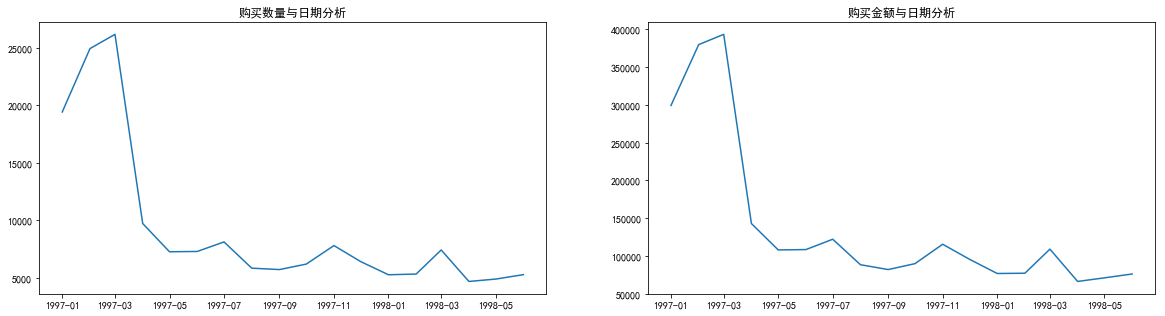

In [69]:
# 图表表示(两张图分开进行表示)
# 图表表示(按数量)
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#--- 
ax1.set_title('购买数量与日期分析')
ax2.set_title('购买金额与日期分析')
ax1.plot(cdnow_df.groupby('month').购买数量.sum())
ax2.plot(cdnow_df.groupby('month').购买金额.sum())

In [72]:
# 对用户消费趋势进行分析
month_grouped = cdnow_df.groupby('month').agg({
     '用户ID':'count',
     '购买数量':'sum',
     '购买金额':'sum'
})
# 消费人数(需要对用户id去重)
month_grouped['user_sum'] = cdnow_df.groupby('month')['用户ID'].nunique()

Populating the interactive namespace from numpy and matplotlib


C:\Users\wd\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


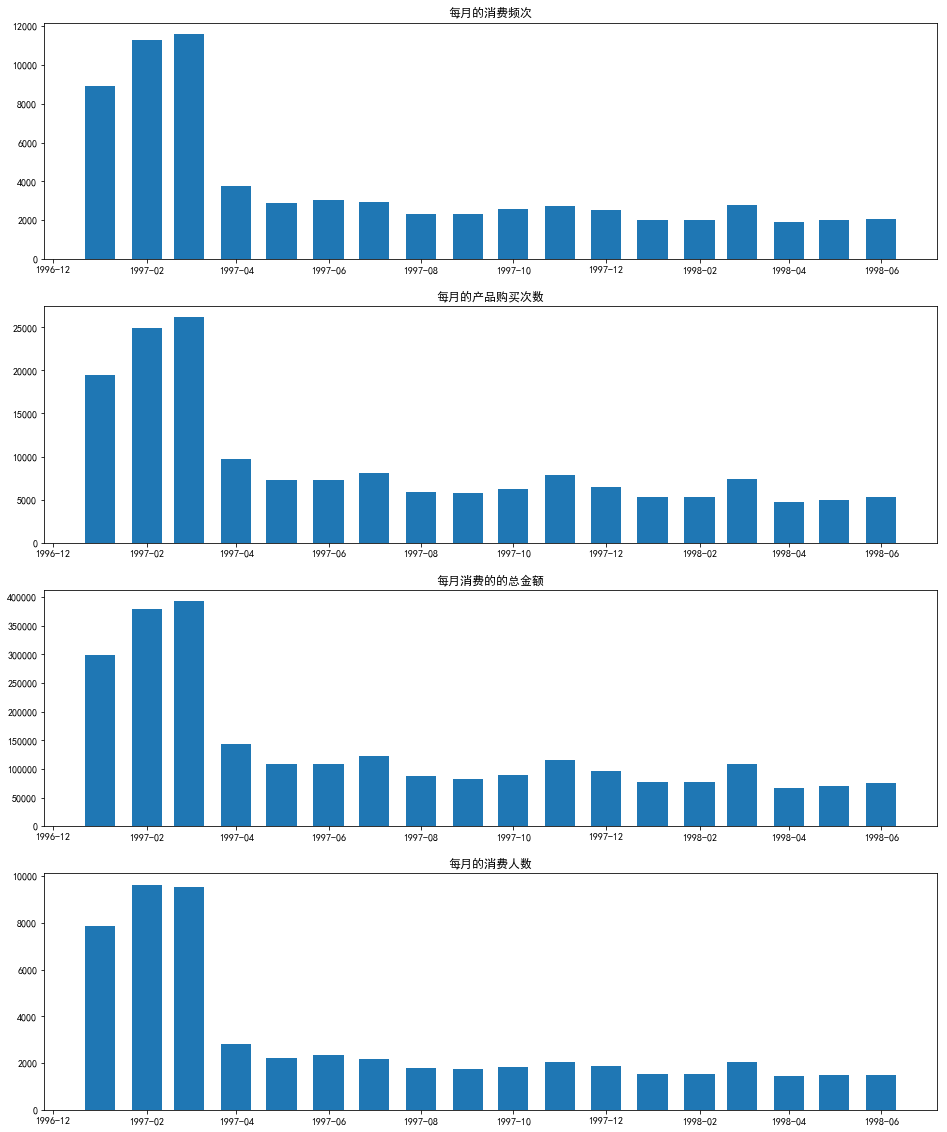

In [76]:
# 对数据做直方图
import pylab
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 20)
fig, axes = plt.subplots(4, 1)
axes0, axes1, axes2, axes3 = axes.flatten()
axes0.bar(month_grouped.index, month_grouped['用户ID'], width=20)
axes0.set_title('每月的消费频次')
axes1.bar(month_grouped.index, month_grouped['购买数量'], width=20)
axes1.set_title('每月的产品购买次数')
axes2.bar(month_grouped.index, month_grouped['购买金额'], width=20)
axes2.set_title('每月消费的的总金额')
axes3.bar(month_grouped.index, month_grouped['user_sum'], width=20)
axes3.set_title('每月的消费人数')

<Container object of 18 artists>

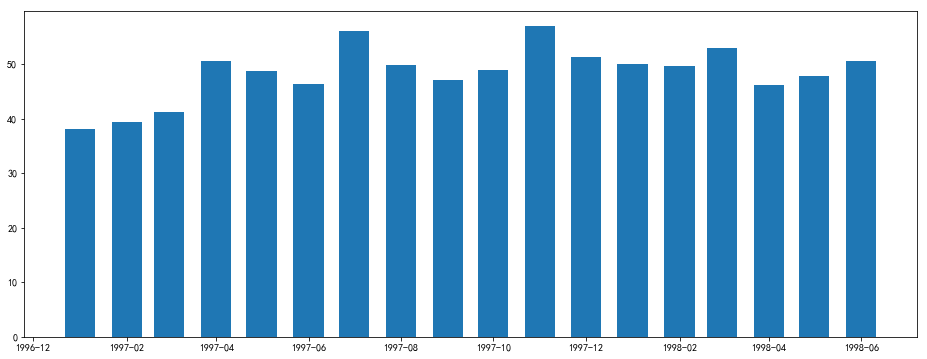

In [78]:
# 每月用户平均消费金额分析
pylab.rcParams['figure.figsize'] = (16, 6)
user_avgamount = month_grouped['购买金额']/month_grouped['user_sum']
plt.bar(user_avgamount.index, user_avgamount, width=20)

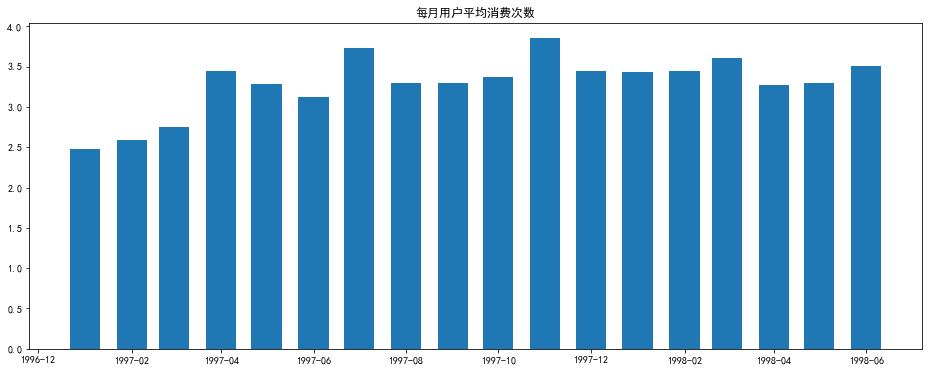

In [81]:
# 每月用户平均消费次数
user_avgorder = month_grouped['购买数量']/month_grouped['user_sum']
plt.bar(user_avgorder.index, user_avgorder, width=20)
plt.title('每月用户平均消费次数')

In [85]:
# 用户消费金额,消费次数描述统计
user_grouped = cdnow_df.groupby('用户ID').agg({'用户ID':'count', '购买数量':'sum', '购买金额':'sum'})
user_grouped.describe()

,用户ID,购买数量,购买金额
count,23570.000000,23570.000000,23570.000000
mean,2.955409,7.122656,106.080426
std,4.736558,16.983531,240.925195
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,19.970000
50%,1.000000,3.000000,43.395000
75%,3.000000,7.000000,106.475000
max,217.000000,1033.000000,13990.930000


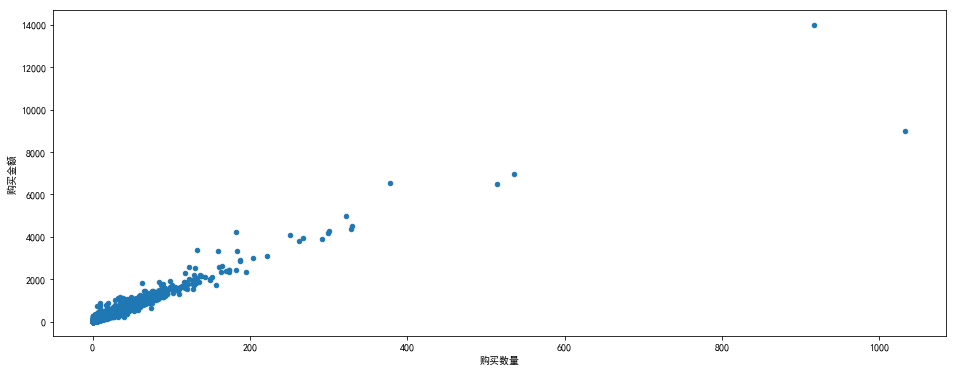

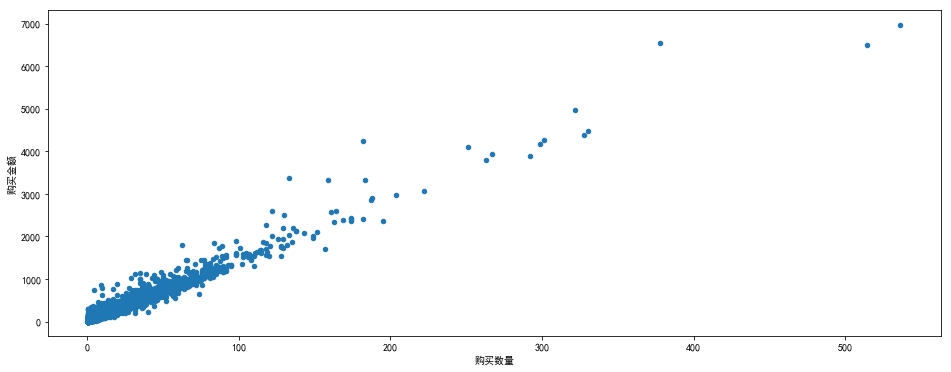

In [91]:
# 绘制用户消费金额和消费次数的散点图
user_grouped.plot.scatter(x='购买数量',y='购买金额')
# 由图中可以看出有离散值
# 剔除离散值
user_grouped_new = user_grouped[user_grouped['购买数量']<800]
user_grouped_new.plot.scatter(x='购买数量', y='购买金额')
# 可以看出订单和金额呈线性关系

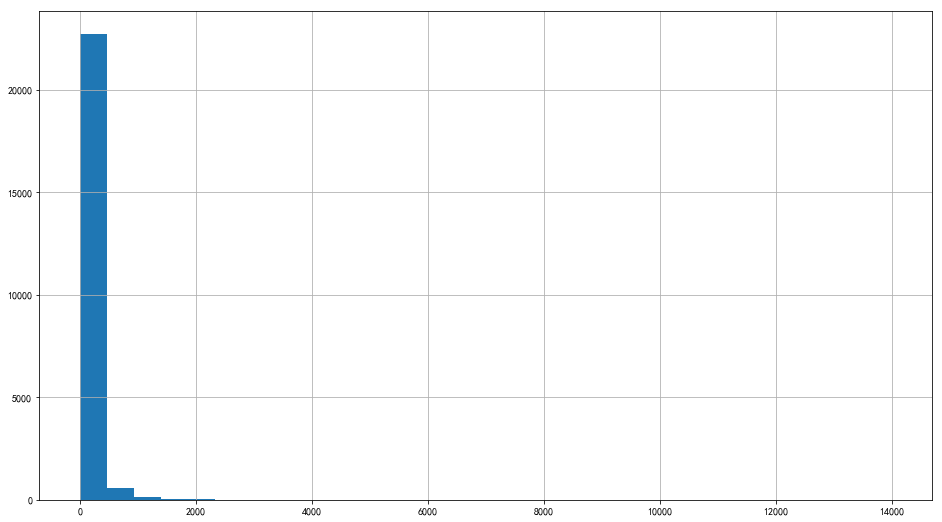

In [93]:
# 用户消费金额分布图
pylab.rcParams['figure.figsize'] = (16, 9)
user_grouped['购买金额'].hist(bins=30)

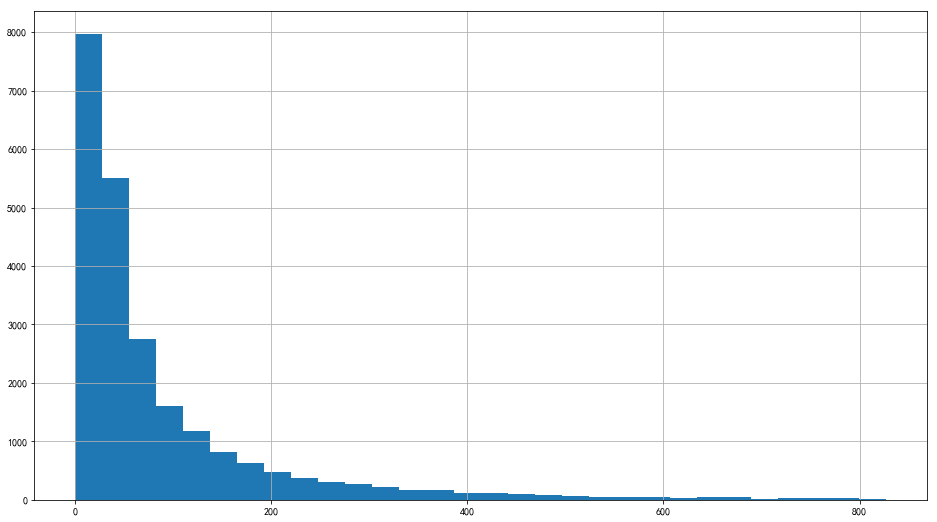

In [98]:
# 过滤掉标准差
#user_grouped['购买金额'].describe()
outlier_amount_limit = user_grouped['购买金额'].describe()['mean'] + 3*user_grouped['购买金额'].describe()['std']
user_grouped_new[user_grouped_new['购买金额'] < outlier_amount_limit]['购买金额'].hist(bins=30)

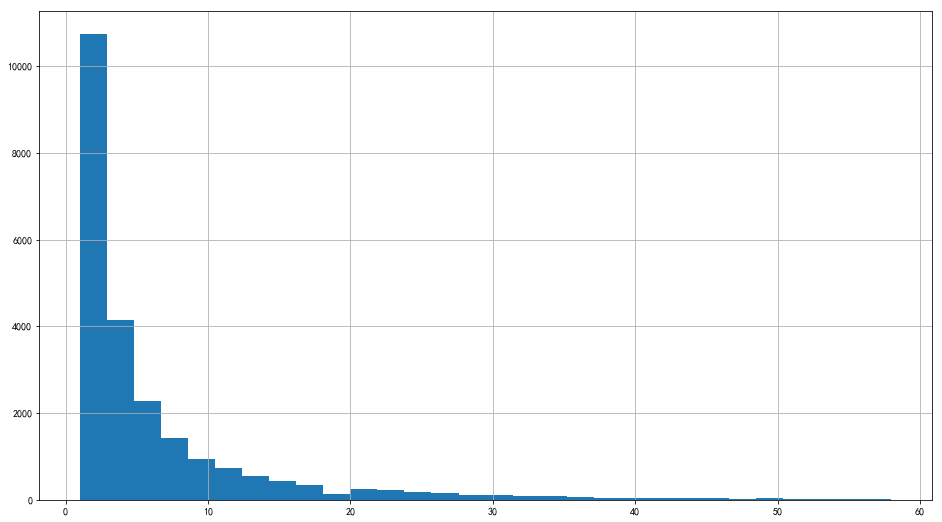

In [102]:
# 用户购买数量分布图(根据切比雪夫定理过滤掉异常值)
user_grouped.query('购买数量 < 58.12')['购买数量'].hist(bins=30)

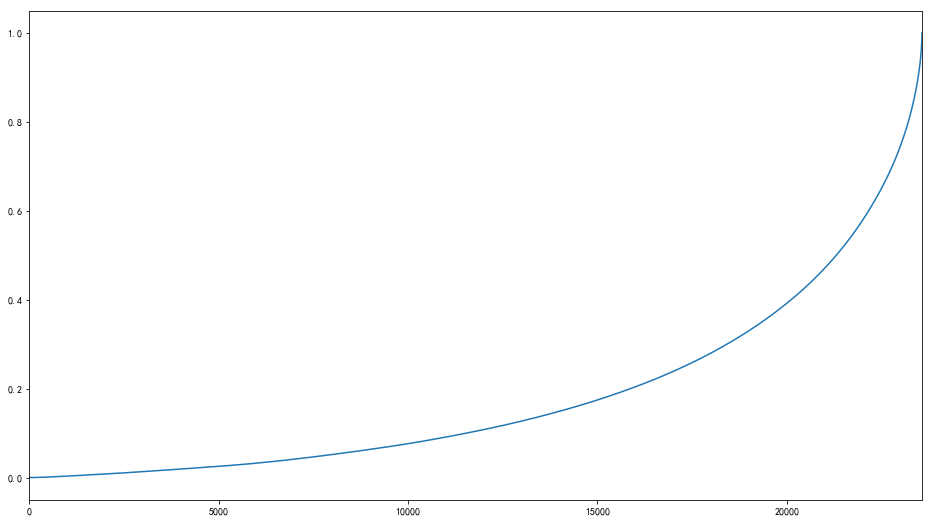

In [107]:
# 用户累计消费金额占比
user_cumsum = user_grouped.sort_values('购买金额').apply(lambda x: x.cumsum()/x.sum())
#user_cumsum.head()
user_cumsum.reset_index(drop=True)['购买金额'].plot()

In [109]:
print (user_cumsum.head(8))
print (user_cumsum.tail(8))

           用户ID      购买数量  购买金额
用户ID                           
10175  0.000014  0.000006   0.0
4559   0.000029  0.000012   0.0
1948   0.000043  0.000018   0.0
925    0.000057  0.000024   0.0
10798  0.000072  0.000030   0.0
19314  0.000086  0.000036   0.0
21690  0.000100  0.000042   0.0
10664  0.000115  0.000048   0.0
           用户ID      购买数量      购买金额
用户ID                               
499    0.989377  0.975995  0.979023
22279  0.989563  0.977961  0.980819
6569   0.990166  0.979879  0.982806
7931   0.991056  0.982940  0.985405
19339  0.991860  0.985192  0.988025
7983   0.993999  0.988385  0.990814
14048  0.997115  0.994538  0.994404
7592   1.000000  1.000000  1.000000


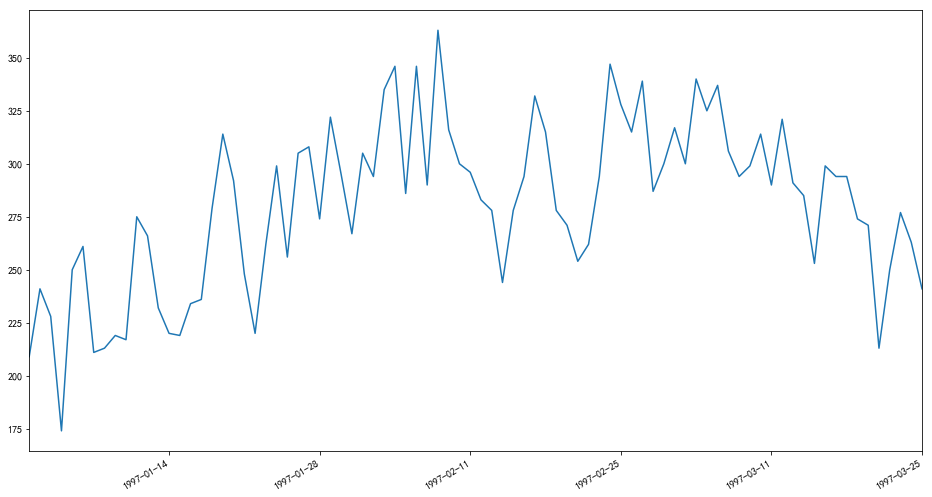

In [114]:
#-- 最早一次购买的时间是多久
cdnow_df.groupby('用户ID')['date'].min().value_counts().plot()

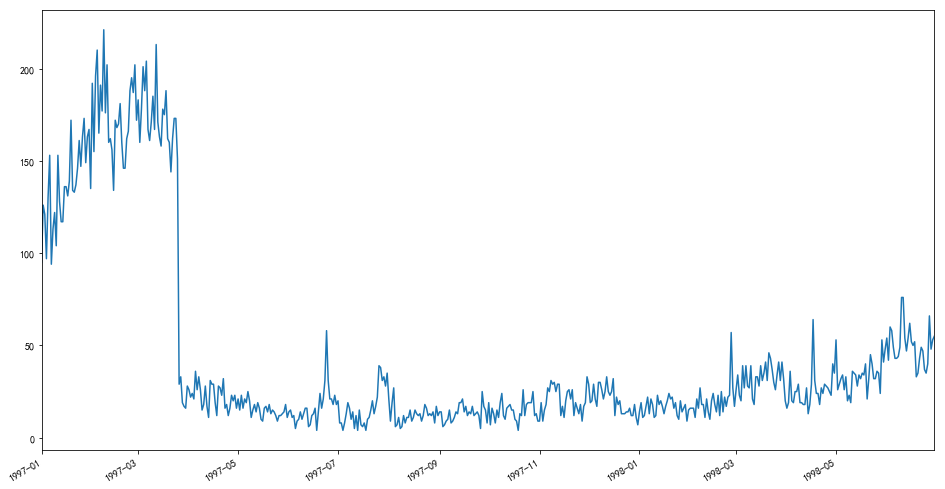

In [116]:
# 用户最后一次消费
cdnow_df.groupby('用户ID')['date'].max().value_counts().plot()
# 最后一次购买基本集中在前三个月,说明很多用户在前三个月进行一次购买后不再回购

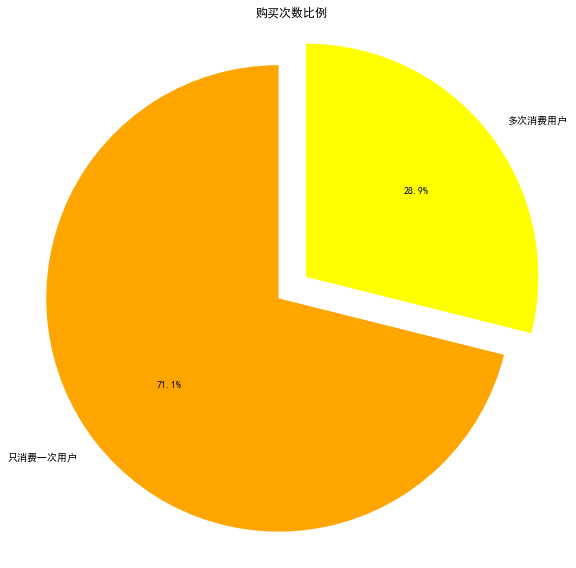

In [133]:
# 新老客户消费比
# 求出用户购买产品日期的最大值和最小值,若该日期的最大值等于最小值说明该用户只消费过一次?(为什么不是按购买次数 如果次数为1 )
user_dt = cdnow_df.groupby('用户ID')['date'].agg(['min', 'max'])
user_df_new = cdnow_df.groupby('用户ID').agg({'购买数量':'sum'})
rate_new = (user_df_new['购买数量'] == 1 ).value_counts()
pylab.rcParams['figure.figsize'] = (8, 8)
rate = (user_dt['min'] == user_dt['max']).value_counts()
labels = ['只消费一次用户','多次消费用户']
plt.pie(
 rate_new,
 labels=labels,
 shadow=False,
 colors=['orange', 'yellow'],
 explode=(0.15, 0),
 startangle=90,
 autopct='%2.1f%%'
)
plt.axis('equal')
plt.title('购买次数比例')
plt.tight_layout()

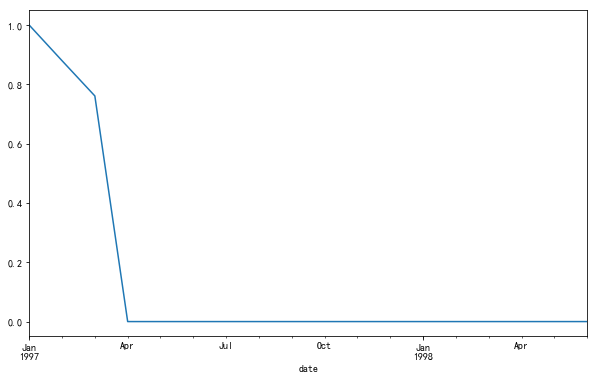

In [137]:
# 对用户按月分组,计算新用户人数占总消费人数的比例:
pylab.rcParams['figure.figsize']=(10,6)
cdnow_df_new = cdnow_df.set_index('date')
user_new = cdnow_df_new.drop_duplicates('用户ID')['用户ID'].resample('m').count()
user_sum = cdnow_df_new.resample('m')['用户ID'].nunique()
(user_new/user_sum).fillna(0).plot()

In [141]:
# 用户分层
# RFM模型: 通过对用户R(Recency 最近一次消费) F(Frequency 消费频率) M(Monetary 消费金额) 三方面的表现进行分类
# 然后对分类分组进行定性描述 分层模型如下RS分类 FS分类 MS分类
# https://www.jianshu.com/p/8c421c176ff8
# RS分布 R的平均值 FS分布 F的平均值 MS分布 M的平均值
# 高: 高于平均值 低: 低于平均值
#cdnow_df_new.head()
cdnow_df_new['period'] = (cdnow_df_new.index - cdnow_df_new.index.max())/np.timedelta64(1, 'D')
cdnow_df_new.head()

,用户ID,购买日期,购买数量,购买金额,month,period
date,,,,,,
1997-01-01,1,19970101,1,11.77,1997-01-01,-545.0
1997-01-12,2,19970112,1,12.00,1997-01-01,-534.0
1997-01-12,2,19970112,5,77.00,1997-01-01,-534.0
1997-01-02,3,19970102,2,20.76,1997-01-01,-544.0
1997-03-30,3,19970330,2,20.76,1997-03-01,-457.0


In [144]:
user_rfm = cdnow_df_new.pivot_table(values=['period', '购买数量','购买金额'],
                                   index='用户ID', aggfunc={'period':'max',
                                                           '购买数量':'count',
                                                           '购买金额':'sum'})
user_rfm = user_rfm.rename(columns={'购买金额':'M', '购买数量':'F', 'period':'R'})
user_rfm.head()
# 将用户在RFM三个维度上按照高于平均值和低于平均值进行划分

,R,F,M
用户ID,,,
1,-545.0,1,11.77
2,-534.0,2,89.00
3,-33.0,6,156.46
4,-200.0,4,100.50
5,-178.0,11,385.61


In [145]:
def level_label(data):
    level = data.apply(lambda x:'1' if x >= 0 else '0')
    label = level['R'] + level['F'] + level['M']
    d = {
        '111':'高价值客户',
        '011':'重点保持客户',
        '101':'重点发展客户',
        '001':'重点挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'潜在客户'
    }
    result = d[label]
    return result
user_rfm['label'] = (user_rfm - user_rfm.mean()).apply(level_label, axis=1)
user_rfm.head()

,R,F,M,label
用户ID,,,,
1,-545.0,1,11.77,潜在客户
2,-534.0,2,89.00,潜在客户
3,-33.0,6,156.46,高价值客户
4,-200.0,4,100.50,一般价值客户
5,-178.0,11,385.61,高价值客户


([<matplotlib.patches.Wedge at 0x2f2fc7cb588>,
  <matplotlib.text.Text at 0x2f2fc410278>])

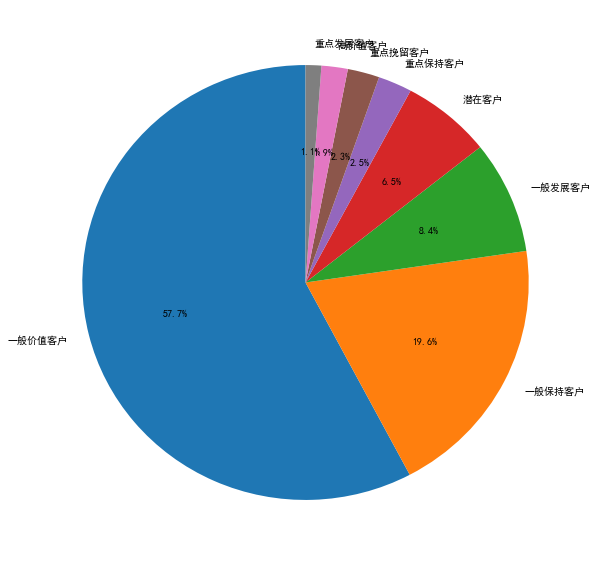

In [171]:
#--- 对用户分层结果计数 --
user_level_rate = user_rfm['label'].value_counts()
labels = ['一般价值客户','一般保持客户','一般发展客户','潜在客户','重点保持客户','重点挽留客户','高价值客户','重点发展客户']
plt.pie(
 user_level_rate,
 labels=labels,
 shadow=False,
 startangle=90,
 autopct='%2.1f%%'
)

In [174]:
# 用户状态分析:注册,活跃,回流,流失(不活跃)统计
pivoted_count = cdnow_df_new.pivot_table(index='用户ID', 
                                     columns='month',
                                     values='购买数量',
                                     aggfunc={'购买数量':'count'})
pivoted_count.fillna(0, inplace=True)
pivoted_count.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户ID,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [177]:
# 进行多重判断,将用户状态判断为unreg, new, active, return, unactive
def status(data):
    state = []
    length = len(data)
    for i in range(18):
        if data[i] > 0:
            if len(state) == 0:
                state.append('new')
            else:
                if state[i-1] == 'unreg':
                    state.append('new')
                elif state[i-1] == 'unactive':
                    state.append('return')
                else:
                    state.append('active')
        else:
            if len(state) == 0:
                state.append('unreg')
            else:
                if state[i-1] == 'unreg':
                    state.append('unreg')
                else:
                    state.append('unactive')
    return state
pivoted_count.apply(status, axis=1)

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户ID,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
6,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
7,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive
8,new,active,unactive,unactive,unactive,return,active,unactive,unactive,unactive,return,active,unactive,unactive,return,unactive,unactive,unactive
9,new,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return


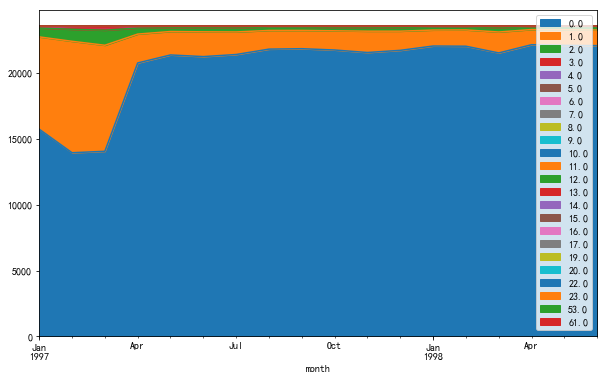

In [180]:
# 
pylab.rcParams['figure.figsize'] = (10, 6)
pivoted_count.replace('unreg', np.NaN).apply(lambda x:pd.value_counts(x)).T.fillna(0).plot.area()

In [182]:
# 对用户的生命周期进行分组(按第一次和最后一次)(shift往左移动一位)
user_period = cdnow_df.groupby('用户ID').apply(lambda x:x['date'] - x['date'].shift())
user_period.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: date, dtype: object

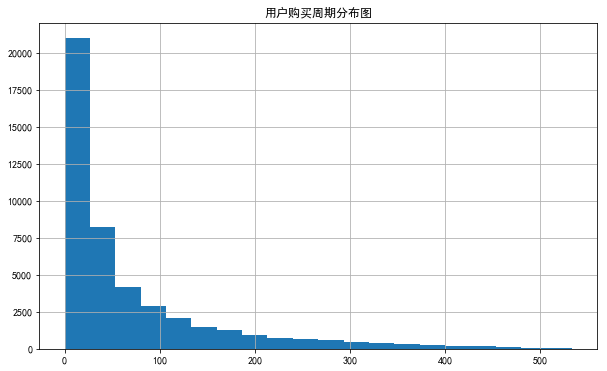

In [183]:
# 用户购买周期
(user_period/np.timedelta64(1, 'D')).hist(bins=20)
plt.title('用户购买周期分布图')

In [187]:
# 用户生命周期
user_cycle = cdnow_df.groupby('用户ID').apply(lambda x:x['date'].max()-x['date'].min())
user_cycle.describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
dtype: object

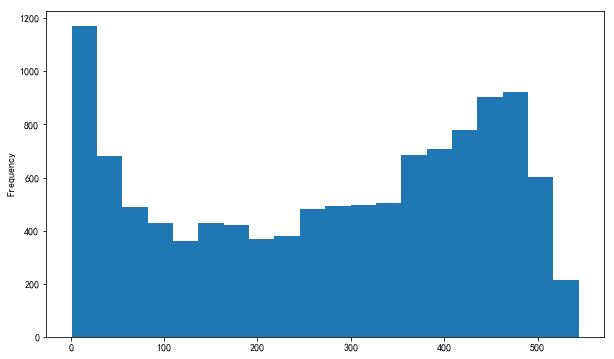

In [188]:
# 去掉0后的生命周期
user_cycle = user_cycle/timedelta64(1, 'D')
user_cycle[user_cycle>0].plot.hist(bins=20)

In [194]:
# 复购率和回购率分析
# 复购率 自然月内 购买多次的用户占比
# 回购率 曾经购买过的用户在某一时期内再次购买的占比
# 复购率 按月为单位进行计算
pivoted_count = cdnow_df.pivot_table(index='用户ID',
                                     columns='month',
                                     values='购买数量',
                                     aggfunc={'购买数量':'count'})
pivoted_count = pivoted_count.fillna(0)
# applymap map apply之间的区别
cdnow_purchase = pivoted_count.applymap(lambda x:1 if x > 1 else np.nan if x == 0 else 0)
cdnow_purchase.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户ID,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


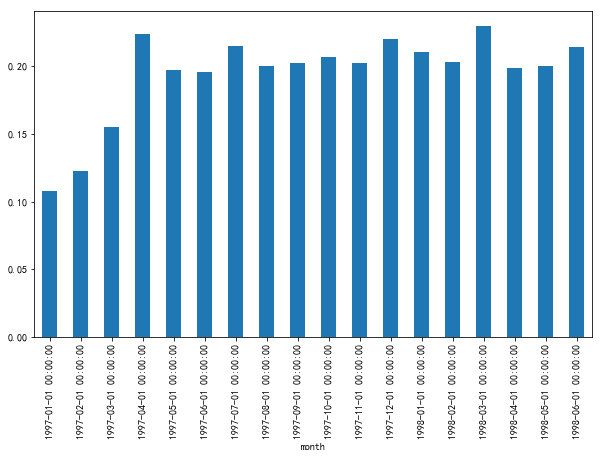

In [196]:
cdnow_purchase.apply(lambda x:x.sum()/x.count()).plot.bar()

In [197]:
# 计算回购率
cdnow_purchase_back = pivoted_count.applymap(lambda x:1 if x > 0 else np.nan)
cdnow_purchase_back.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户ID,,,,,,,,,,,,,,,,,,
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN


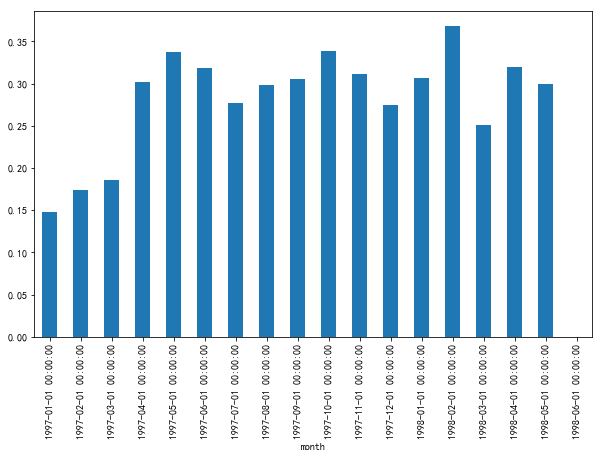

In [199]:
def purchase_back(data):
    lenth = len(data)
    state = []
    for i in range(0, lenth-1):
        if data[i] == 1:
            if data[i+1] == 1:
                state.append(1) #-- 本月已消费 下月也消费了
            else:
                state.append(0) #-- 本月已消费 下月未消费
        else:
            state.append(np.nan) #本月未消费
    state.append(np.nan)
    return state
df_purchased_b = cdnow_purchase_back.apply(purchase_back, axis=1)
df_purchased_b.apply(lambda x:x.sum()/x.count()).plot.bar()
            